<div style="text-align: center"><b>INFO 6105 Data Science Eng Methods and Tools</div>
<div style="text-align: center"><b>Name - Vivek Sharma</div>
<div style="text-align: center"><b>NUID - 002105272</div>
<div style="text-align: center"><b>Name - Shashank Dongre</div>
<div style="text-align: center"><b>NUID - 002747740</div>
<div style="text-align: center"><b>Name - Gauri Shrikanth Pasarkar</div>
<div style="text-align: center"><b>NUID - 001590645</div>

# Assignment 4B : Elvis

In [169]:
from IPython.display import Image

<b> Setting the Photos path

In [170]:
import os
path = os.getcwd()
photos = path+"/images/"
new_photos = path+"/new_images/"
if not os.path.isdir(new_photos):
            os.mkdir(new_photos)

<b> Setting up the Poster

In [171]:
from PIL import Image as pili, ImageOps as piliops

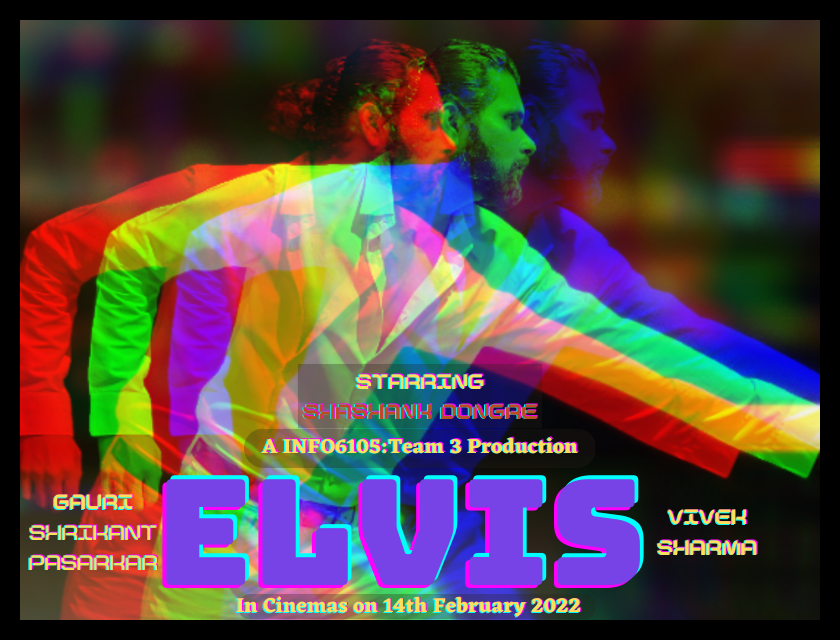

In [172]:
cover_photo_path = photos+'Elvis.png'
new_cover_photo_path = new_photos+'new_Elvis.png'
piliops.expand(pili.open(cover_photo_path), border=(20,20),fill='black').save(new_cover_photo_path)
Image(filename=new_cover_photo_path, width=400)

### Code: Prepare comic book

**Read the .xslx files which contains all the dialogues in English**

In [173]:
# import pandas lib as pd
import pandas as pd
 
# read by default 1st sheet of an excel file
image_dialogue = pd.read_excel('image_dialogue.xlsx')
 
image_dialogue.head()

,Image,English,Hindi
0,737,Everybody's talkin' 'bout this new Presley kid,इस नए प्रेस्ली बच्चे के बारे में हर कोई बात कर...
1,747,He's white?,वह सफेद है?
2,927,The Lord gave us music to bring people togethe...,लोगों को एक साथ लाने के लिए प्रभु ने हमें संगी...
3,1250,"[all singing] Oh, I'll fly away","[सभी गा रहे हैं] ओह, मैं उड़ जाऊंगा"
4,1307,"He's a young singer from Memphis, Tennessee. \...","वह मेम्फिस, टेनेसी के एक युवा गायक हैं। \nमिस्..."


In [174]:
from PIL import Image as pili, ImageDraw as pild, ImageFont as pilf 
import numpy as np
from PIL import Image, ImageFont, ImageDraw

**Code to overlay the dialogues on the images**

In [175]:
unprocessed=[]
for i in range(len(image_dialogue)):
    try:
        image_name = str(image_dialogue.loc[i,"Image"])
        english=image_dialogue.loc[i,"English"]
        hindi=image_dialogue.loc[i,"Hindi"]

        TINT_COLOR = (0,0,0)  # Black
        TRANSPARENCY = .50  # Degree of transparency, 0-100%
        OPACITY = int(255 * TRANSPARENCY)

        # For English
        img = pili.open(photos+image_name+'.jpg').convert('RGBA')

        overlay = pili.new('RGBA', img.size, TINT_COLOR+(0,))
        draw = pild.Draw(overlay)
        #font = ImageFont.load_default()
        font = pilf.truetype("Noto_Sans/NotoSans-Bold.ttf", 50)
        #x, y = (img.width - 510, img.height-100)
        text = english
        w, h = font.getsize(text)
        num_lines = len(text.split('\n'))
        #print(num_lines, w, h)
        x, y = 100, img.height - (num_lines-0.1*num_lines)*h*1.2
        #draw.rectangle((x, y, x + w, y + h), fill='black')
        #draw.rectangle((x, y, x + w, y + 4*h), fill=TINT_COLOR+(OPACITY,))
        draw.rectangle((x, y, x + img.width - 200, y + (num_lines-0.1*num_lines)*h*1.09), fill=TINT_COLOR+(OPACITY,))
        draw.multiline_text((x, y), text, fill=(209, 239, 8), font=font)

        #209, 239, 8

        # Alpha composite these two images together to obtain the desired result.
        img = pili.alpha_composite(img, overlay)
        img = img.convert("RGB") # Remove alpha for saving in jpg format.
        
        eng_dir=new_photos+"English/"
        if not os.path.isdir(eng_dir):
            os.mkdir(eng_dir)

        img.save(eng_dir +image_name+'.jpg')
        
        # For Hindi
        img = pili.open(photos+image_name+'.jpg').convert('RGBA')

        overlay = pili.new('RGBA', img.size, TINT_COLOR+(0,))
        draw = pild.Draw(overlay)
        #font = ImageFont.load_default()
        font = pilf.truetype("Noto_Sans/NotoSans-Bold.ttf", 50)
        #x, y = (img.width - 510, img.height-100)
        text = hindi
        w, h = font.getsize(text)
        num_lines = len(text.split('\n'))
        #print(num_lines, w, h)
        x, y = 100, img.height - (num_lines-0.1*num_lines)*h*1.2
        #draw.rectangle((x, y, x + w, y + h), fill='black')
        #draw.rectangle((x, y, x + w, y + 4*h), fill=TINT_COLOR+(OPACITY,))
        draw.rectangle((x, y, x + img.width - 200, y + (num_lines-0.1*num_lines)*h*1.09), fill=TINT_COLOR+(OPACITY,))
        draw.multiline_text((x, y), text, fill=(209, 239, 8), font=font)

        #209, 239, 8

        # Alpha composite these two images together to obtain the desired result.
        img = pili.alpha_composite(img, overlay)
        img = img.convert("RGB") # Remove alpha for saving in jpg format.
        
        hin_dir=new_photos+"Hindi/"
        if not os.path.isdir(hin_dir):
            os.mkdir(hin_dir)

        img.save(hin_dir +image_name+'.jpg')
        
    except Exception as err:
            print("Couldn't process"+image_name)
            print(err)
            unprocessed.append(image_name)
    
print("Complete")
unprocessed


/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467

/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467

/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467

/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467

/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467

/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467

Complete


/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:21: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)
/var/folders/cg/df7my01n513dhb5mldngwtzw0000gn/T/ipykernel_77773/467656959.py:51: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  w, h = font.getsize(text)


[]

In [176]:
filelist=os.listdir(eng_dir)
for fetch in filelist[:]: # filelist[:] makes a copy of filelist.
    if not(fetch.endswith(".jpg")):
        filelist.remove(fetch)
        
filelist1=os.listdir(hin_dir)
for fetch in filelist1[:]: # filelist[:] makes a copy of filelist.
    if not(fetch.endswith(".jpg")):
        filelist1.remove(fetch)

In [177]:
from natsort import natsort_keygen
natsort_key = natsort_keygen()
sorted_files = sorted(filelist, key=natsort_key)
sorted_files1 = sorted(filelist1, key=natsort_key)

**Putting 20 images in a grid for English**

In [178]:
import PIL, os, glob
from PIL import Image
from math import ceil, floor

frame_width = 1920
images_per_row = 5
padding = 20

#images = glob.glob("*.jpg")
images = sorted_files[:20] #get the first 20 images
#print(images)

img_width, img_height = Image.open(eng_dir+images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(eng_dir+im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(new_photos +"eng_out.jpg", "JPEG", quality=100, optimize=True, progressive=False)


In [179]:
import PIL, os, glob
from PIL import Image
from math import ceil, floor

frame_width = 1920
images_per_row = 5
padding = 20

#images = glob.glob("*.jpg")
images = sorted_files[20:40] #get the next 20 images
#print(images)

img_width, img_height = Image.open(eng_dir+images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(eng_dir+im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(new_photos +"eng_out1.jpg", "JPEG", quality=100, optimize=True, progressive=False)

In [180]:
import PIL, os, glob
from PIL import Image
from math import ceil, floor

frame_width = 1920
images_per_row = 5
padding = 20

#images = glob.glob("*.jpg")
images = sorted_files[40:60] #get the next 20 images
#print(images)

img_width, img_height = Image.open(eng_dir+images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(eng_dir+im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(new_photos +"eng_out2.jpg", "JPEG", quality=100, optimize=True, progressive=False)

In [181]:
import PIL, os, glob
from PIL import Image
from math import ceil, floor

frame_width = 1920
images_per_row = 5
padding = 20

#images = glob.glob("*.jpg")
images = sorted_files[60:80] #get the next 20 images
#print(images)

img_width, img_height = Image.open(eng_dir+images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(eng_dir+im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(new_photos +"eng_out3.jpg", "JPEG", quality=100, optimize=True, progressive=False)

In [182]:
import PIL, os, glob
from PIL import Image
from math import ceil, floor

frame_width = 1920
images_per_row = 5
padding = 20

#images = glob.glob("*.jpg")
images = sorted_files[80:100] #get the next 20 images
#print(images)

img_width, img_height = Image.open(eng_dir+images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(eng_dir+im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(new_photos +"eng_out4.jpg", "JPEG", quality=100, optimize=True, progressive=False)

**Putting 20 images in a grid for Hindi**

In [183]:
import PIL, os, glob
from PIL import Image
from math import ceil, floor

frame_width = 1920
images_per_row = 5
padding = 20

#images = glob.glob("*.jpg")
images = sorted_files[:20] #get the first 20 images
#print(images)

img_width, img_height = Image.open(hin_dir+images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(hin_dir+im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(new_photos +"hin_out.jpg", "JPEG", quality=100, optimize=True, progressive=False)

import PIL, os, glob
from PIL import Image
from math import ceil, floor

frame_width = 1920
images_per_row = 5
padding = 20

#images = glob.glob("*.jpg")
images = sorted_files[20:40] #get the next 20 images
#print(images)

img_width, img_height = Image.open(hin_dir+images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(hin_dir+im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(new_photos +"hin_out1.jpg", "JPEG", quality=100, optimize=True, progressive=False)
import PIL, os, glob
from PIL import Image
from math import ceil, floor

frame_width = 1920
images_per_row = 5
padding = 20

#images = glob.glob("*.jpg")
images = sorted_files[40:60] #get the next 20 images
#print(images)

img_width, img_height = Image.open(hin_dir+images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(hin_dir+im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(new_photos +"hin_out2.jpg", "JPEG", quality=100, optimize=True, progressive=False)
import PIL, os, glob
from PIL import Image
from math import ceil, floor

frame_width = 1920
images_per_row = 5
padding = 20

#images = glob.glob("*.jpg")
images = sorted_files[60:80] #get the next 20 images
#print(images)

img_width, img_height = Image.open(hin_dir+images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(hin_dir+im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(new_photos +"hin_out3.jpg", "JPEG", quality=100, optimize=True, progressive=False)
import PIL, os, glob
from PIL import Image
from math import ceil, floor

frame_width = 1920
images_per_row = 5
padding = 20

#images = glob.glob("*.jpg")
images = sorted_files[80:100] #get the next 20 images
#print(images)

img_width, img_height = Image.open(hin_dir+images[0]).size
sf = (frame_width-(images_per_row-1)*padding)/(images_per_row*img_width)       #scaling factor
scaled_img_width = ceil(img_width*sf)                   #s
scaled_img_height = ceil(img_height*sf)

number_of_rows = ceil(len(images)/images_per_row)
frame_height = ceil(sf*img_height*number_of_rows) 

new_im = Image.new('RGB', (frame_width, frame_height))

i,j=0,0
for num, im in enumerate(images):
    if num%images_per_row==0:
        i=0
    im = Image.open(hin_dir+im)
    #Here I resize my opened image, so it is no bigger than 100,100
    im.thumbnail((scaled_img_width,scaled_img_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    y_cord = (j//images_per_row)*scaled_img_height
    new_im.paste(im, (i,y_cord))
    #print(i, y_cord)
    i=(i+scaled_img_width)+padding
    j+=1

#new_im.show()
new_im.save(new_photos +"hin_out4.jpg", "JPEG", quality=100, optimize=True, progressive=False)

**Making PDF out of all the images**

In [184]:
from PIL import Image
from fpdf import FPDF

im = Image.open(new_cover_photo_path)
rgb_im = im.convert('RGB')
rgb_im.save(path+'/cover.jpg')

#pdf = FPDF()
cover = Image.open(new_cover_photo_path)
width, height = cover.size

eng_pdf = FPDF(unit = "pt", format = [width, height])
hin_pdf = FPDF(unit = "pt", format = [width, height])


# imagelist is the list with all image filenames
eng_imagelist = ['cover.jpg',new_photos+'eng_out.jpg',new_photos+'eng_out1.jpg',new_photos+'eng_out2.jpg',new_photos+'eng_out3.jpg',new_photos+'eng_out4.jpg']
hin_imagelist = ['cover.jpg',new_photos+'hin_out.jpg',new_photos+'hin_out1.jpg',new_photos+'hin_out2.jpg',new_photos+'hin_out3.jpg',new_photos+'hin_out4.jpg']

for image in eng_imagelist:
    eng_pdf.add_page()
    eng_pdf.image(image, 0, 0, width, height)
eng_pdf.output("Elvis_English.pdf", "F")
print("Done! English PDF is ready to view")

for image in hin_imagelist:
    hin_pdf.add_page()
    hin_pdf.image(image, 0, 0, width, height)
hin_pdf.output("Elvis_Hindi.pdf", "F")
print("Done! Hindi PDF is ready to view")

Done! English PDF is ready to view
Done! Hindi PDF is ready to view
